Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..12.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..3.0].


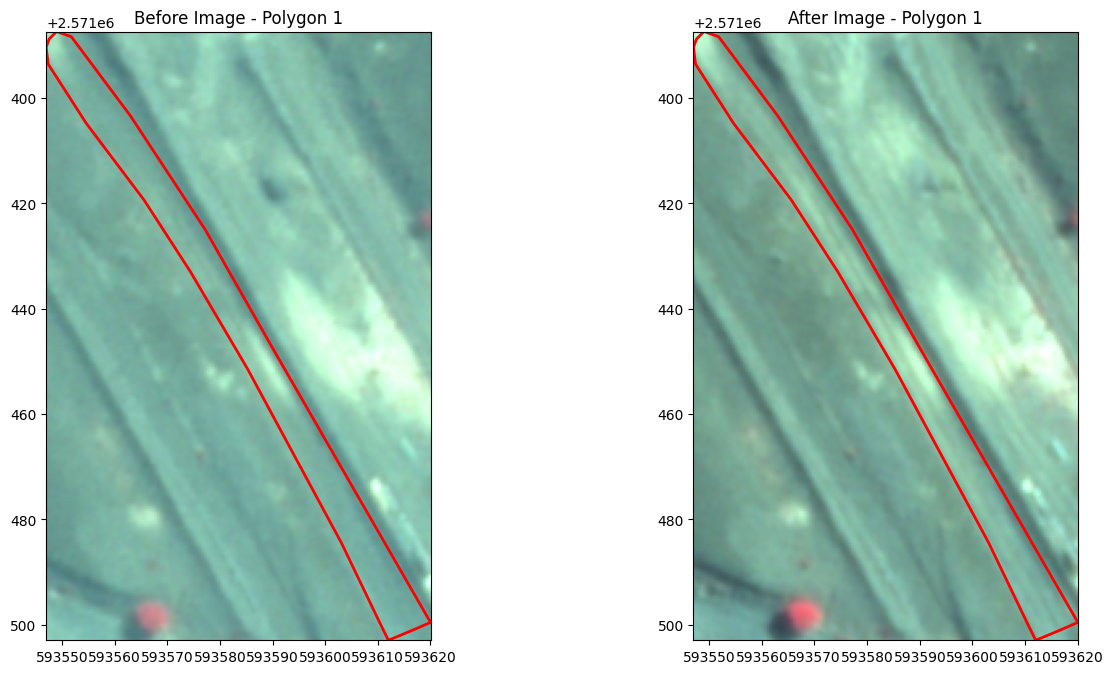

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..12.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..3.0].


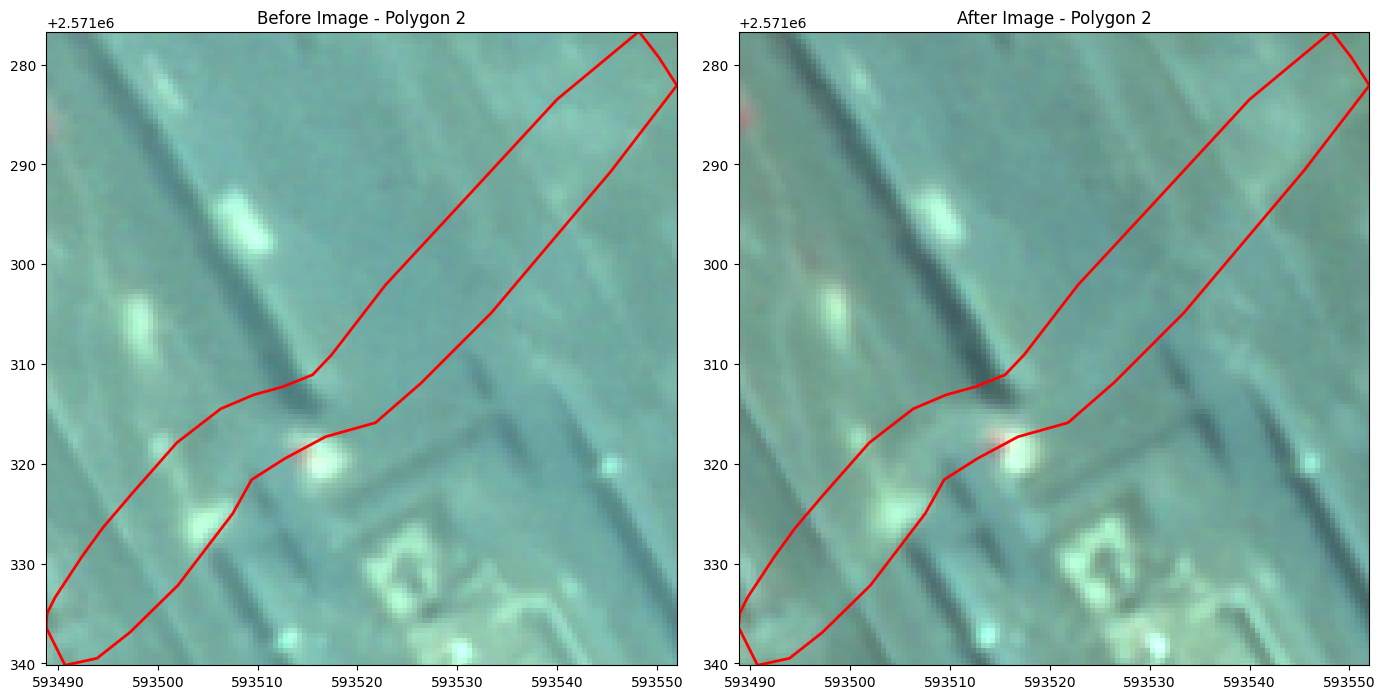

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..12.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..3.0].


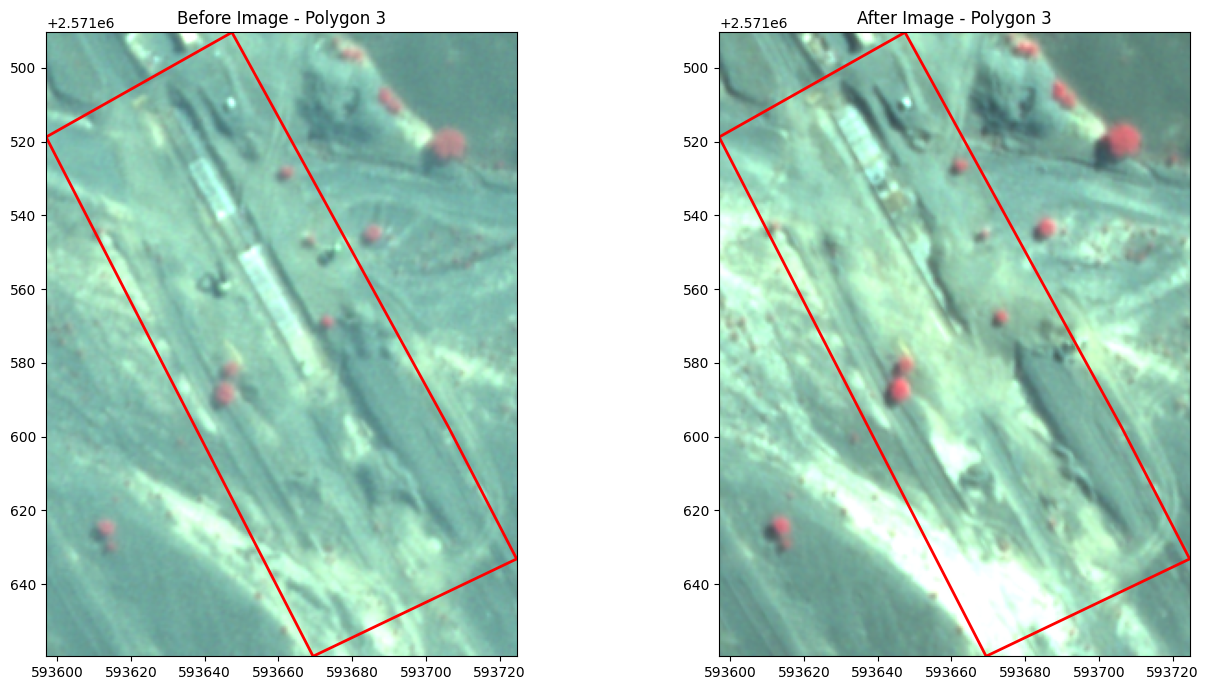

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..12.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..3.0].


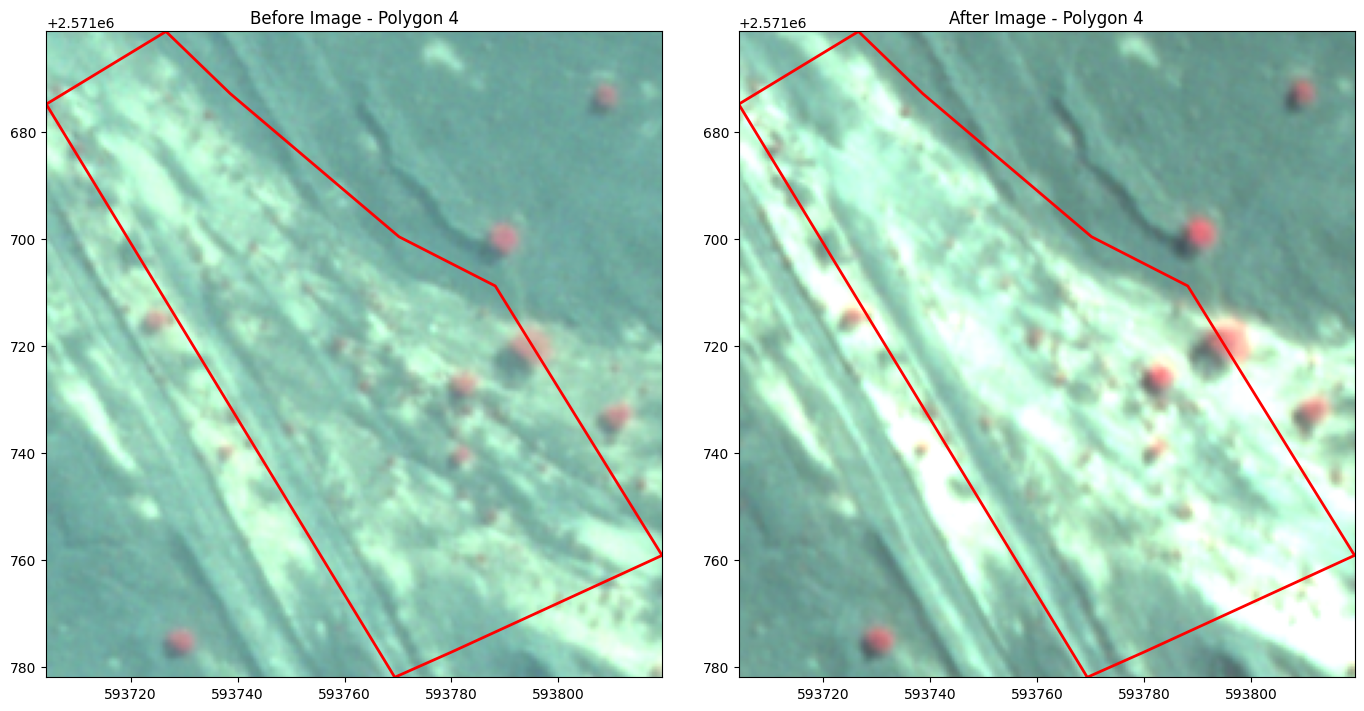

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..12.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..3.0].


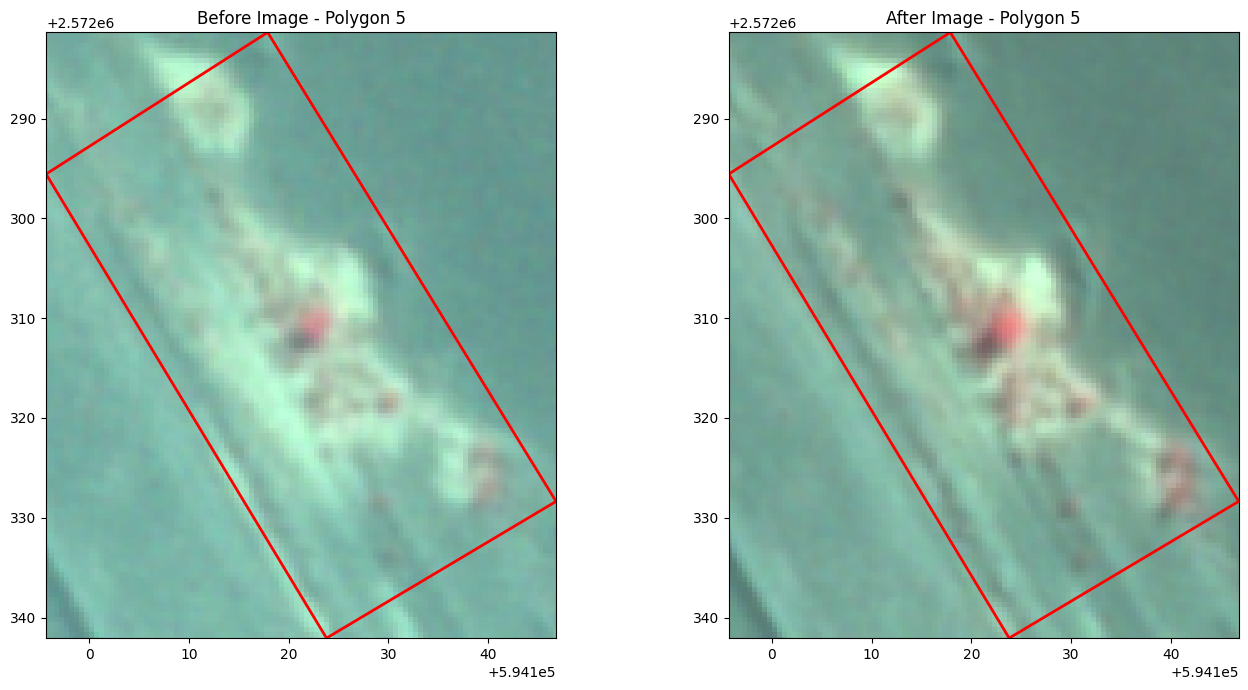

In [1]:
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
import numpy as np

base_path = '../Dataset'

# Load the shapefile that contains the polygons of changes
shapefile_path = base_path + '/Change_area.shp'  
change_polygons = gpd.read_file(shapefile_path)

# Load the before and after images
before_image_path = base_path + '/Image_t0_subset.tif'  # Your before image path
after_image_path = base_path + '/Image_t1_subset.tif'   # Your after image path

before_image = rasterio.open(before_image_path)
after_image = rasterio.open(after_image_path)

# LIMIT SET DUE TO RENDERING PERFORMANCE. CHANGE/REMOVE TO RENDER ALL.
max_polygons = 5

# Loop through each polygon in the shapefile and visualize
for idx, row in change_polygons.iterrows():
    if idx >= max_polygons: 
        break
    
    polygon = row['geometry']  
    
    minx, miny, maxx, maxy = polygon.bounds
    
    before_rgb = before_image.read([4, 3, 2])  
    after_rgb = after_image.read([4, 3, 2])   

    # Normalize the data to the range [0, 1] for display
    def normalize_raster(data):
        """Normalize raster data to the range [0, 1]."""
        data = np.moveaxis(data, 0, -1)  
        data_min = data.min()
        data_max = data.max()
        
        if data_max - data_min == 0:  
            return np.zeros(data.shape)  
          
        normalized = (data - data_min) / (data_max - data_min)
        return np.clip(normalized, 0, 1)  
    
    # brightness set as the before image is dark
    before_brightness_factor = 12 
    after_brightness_factor = 3  

    before_rgb = normalize_raster(before_rgb) * before_brightness_factor
    after_rgb = normalize_raster(after_rgb) * after_brightness_factor

    # Plot the before and after images for each polygon
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
    
    # Display the 'Before' image in RGB.
    ax1.set_title(f"Before Image - Polygon {idx + 1}")
    ax1.imshow(before_rgb, extent=(before_image.bounds.left, before_image.bounds.right, before_image.bounds.bottom, before_image.bounds.top))
    
    # Set the extent to the bounding box of the polygon
    ax1.set_xlim(minx, maxx)
    ax1.set_ylim(maxy, miny)  

    # Plot the polygon on the 'Before' image
    gpd.GeoSeries([polygon]).boundary.plot(ax=ax1, edgecolor='red', linewidth=2)

    # Display the 'After' image in RGB
    ax2.set_title(f"After Image - Polygon {idx + 1}")
    ax2.imshow(after_rgb, extent=(after_image.bounds.left, after_image.bounds.right, after_image.bounds.bottom, after_image.bounds.top))
    
    # Set the extent to the bounding box of the polygon
    ax2.set_xlim(minx, maxx)
    ax2.set_ylim(maxy, miny)  

    # Plot the polygon on the 'After' image
    gpd.GeoSeries([polygon]).boundary.plot(ax=ax2, edgecolor='red', linewidth=2)

    plt.tight_layout()
    plt.show()